In [1]:
#Import functions and models to pass to those functions
from functions_model_testing import features_extraction, similarity_extraction, plot_recommendations
from torchvision import models
import warnings
warnings.filterwarnings("ignore")

In [2]:
input_path = "/teamspace/studios/this_studio/ProjectIII/women_fashion/anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg"
data_path = "/teamspace/studios/this_studio/ProjectIII/women_fashion"

#dict with models that are going to be tested and the image size they require as a tuple (model, size) (Different models may require different image sizes)
test_models = {
    #"resnet": (models.resnet18(pretrained=True), 224),
    #"alexnet": (models.alexnet(pretrained=True), 224),
    "vgg16": (models.vgg16(pretrained=True), 224),
    "densenet": (models.densenet161(pretrained=True), 224),
    "inception": (models.inception_v3(pretrained=True), 299),
    #"googlenet": (models.googlenet(pretrained=True), 224),
}

In [3]:
sorted_sim_per_model = {}
for model_name in test_models:

    model, size = test_models[model_name]
    features = features_extraction(model, data_path, size=299)
    sorted_similarities = similarity_extraction(input_path, features, method="cosine")
    sorted_sim_per_model[model_name] = sorted_similarities



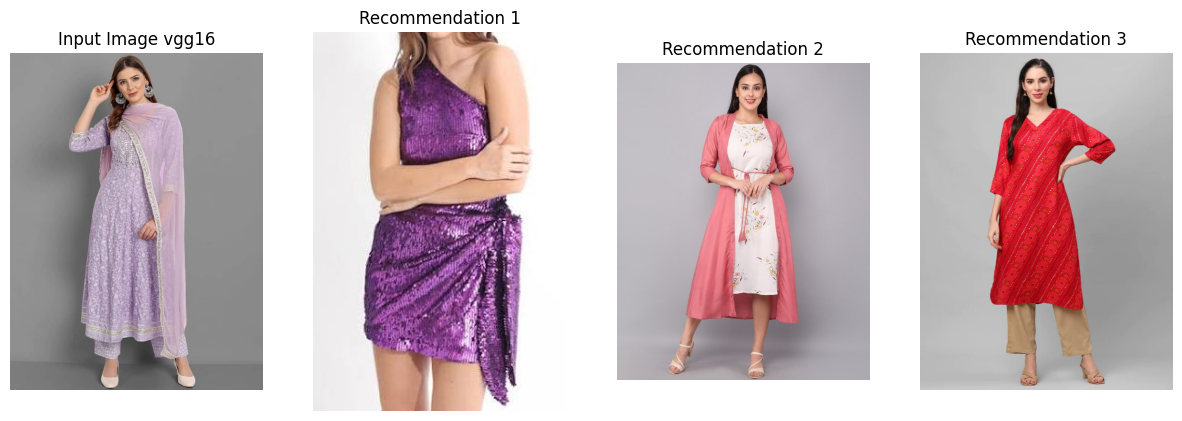

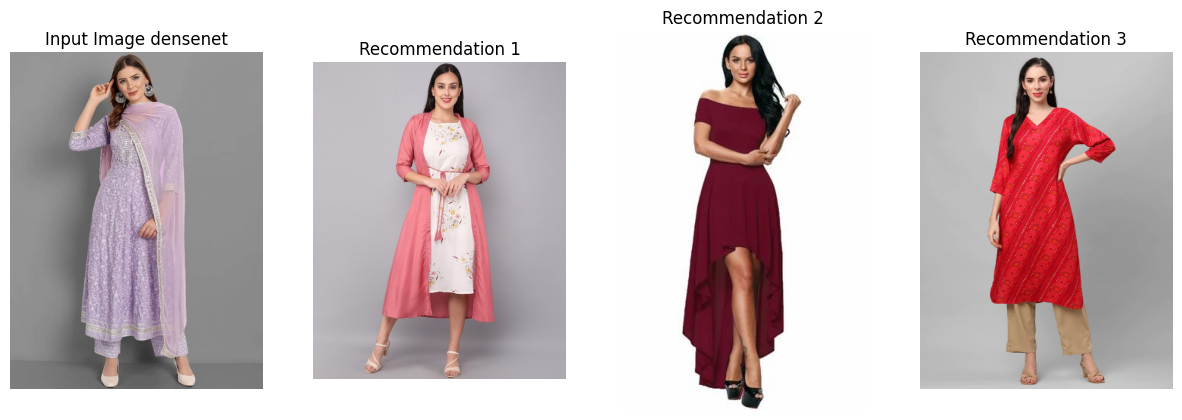

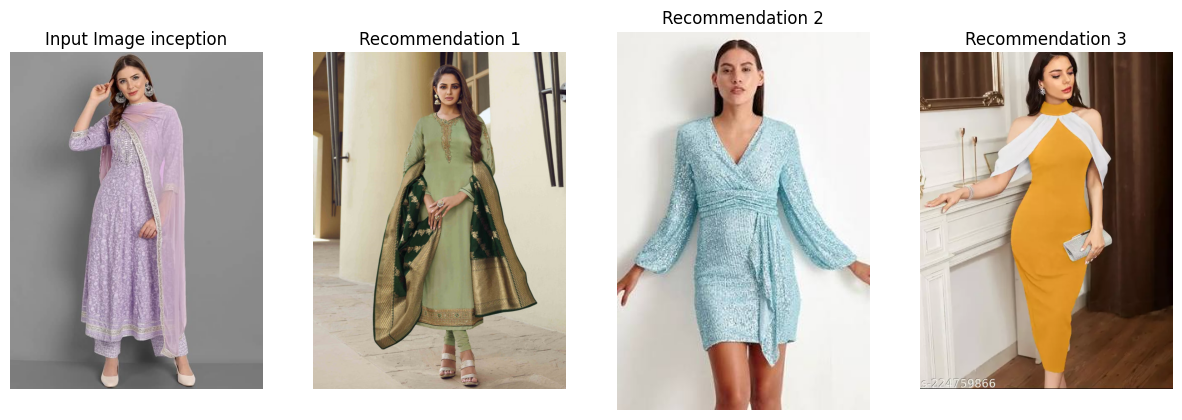

In [4]:
import time

for model_name in sorted_sim_per_model:
    
    plot_recommendations(sorted_sim_per_model[model_name], model_name=model_name, top_n=3)